# Task 4: Proxy Target Variable Engineering - Complete Roadmap

## 🎯 Overall Objective
Create a binary risk classification (high/low) for customers using RFM (Recency, Frequency, Monetary) analysis and K-means clustering, then integrate this target variable back into the main dataset for model training.

## 📊 Rubric Coverage (5 pts)
- [ ] RFM calculation per CustomerId (using a snapshot date)
- [ ] Scaling/preprocessing of RFM features prior to clustering
- [ ] K-Means clustering set for 3 groups with defined random_state
- [ ] Binary 'is_high_risk' column creation
- [ ] Merging the target back into the main dataset

## 📋 To-Do List

1. **Data Preparation**
   - Load preprocessed transaction data
   - Set snapshot date for RFM calculation
   - Verify data integrity and handle missing values

2. **RFM Calculation**
   - Calculate Recency, Frequency, and Monetary metrics
   - Handle outliers and extreme values
   - Validate calculations with summary statistics

3. **Feature Engineering**
   - Apply log transformation to handle skewness
   - Scale features to standard normal distribution
   - Visualize feature distributions pre/post transformation

4. **Customer Segmentation**
   - Apply K-means clustering (k=3) with random_state=42
   - Analyze cluster characteristics and centroids
   - Validate cluster quality using silhouette score

5. **Risk Label Creation**
   - Identify high-risk cluster based on business context
   - Create binary 'is_high_risk' column (1=high risk, 0=low risk)
   - Analyze class distribution and business implications

6. **Data Integration**
   - Merge risk labels back to main dataset
   - Handle any merge issues or missing values
   - Save processed dataset for model training

7. **Documentation & Validation**
   - Document all assumptions and decisions
   - Create visualizations of clusters and risk distribution
   - Prepare summary statistics and business interpretation

## 📝 Detailed Breakdown

### 1. Data Preparation
**What to do:**
- Load the preprocessed transaction data from Task 3
- Set snapshot date to the most recent transaction date
- Verify no missing CustomerIds or transaction dates

**What to expect:**
- Clean DataFrame with transaction history
- Single datetime value for consistent RFM calculation
- Potential data quality issues to address

**Result:**
- Verified dataset ready for RFM calculation
- Snapshot date established for consistent analysis

### 2. RFM Calculation
**What to do:**
- **Recency**: Days between last transaction and snapshot date
- **Frequency**: Count of transactions per customer
- **Monetary**: Sum of transaction values per customer

**What to expect:**
- Right-skewed distributions, especially for Frequency and Monetary
- Potential outliers requiring treatment
- Need for log transformation of Monetary values

**Result:**
- RFM metrics calculated for each customer
- Initial customer behavior patterns visible
- Outliers identified for treatment

### 3. Feature Engineering
**What to do:**
- Apply winsorization to handle outliers (1st-99th percentiles)
- Log transform Frequency and Monetary features
- Scale all features to standard normal (mean=0, std=1)

**What to expect:**
- Reduced impact of extreme values
- More normally distributed features
- Features on comparable scales

**Result:**
- Processed RFM features ready for clustering
- Reduced bias from outliers
- Improved cluster quality

### 4. Customer Segmentation
**What to do:**
- Initialize K-means with n_clusters=3 and random_state=42
- Fit on scaled RFM features
- Analyze cluster characteristics

**What to expect:**
- Three distinct customer segments
- One cluster showing high-risk characteristics
- Potential need for cluster interpretation

**Result:**
- Cluster labels assigned to each customer
- Understanding of segment characteristics
- Identification of high-risk behaviors

### 5. Risk Label Creation
**What to do:**
- Analyze cluster centers to identify high-risk profile
- Label the most concerning cluster as high-risk (is_high_risk=1)
- Validate with business context

**What to expect:**
- Potentially imbalanced classes
- Need for business validation
- Possible refinement of risk thresholds

**Result:**
- Binary risk labels for all customers
- Understanding of risk distribution
- Documentation of risk criteria

### 6. Data Integration
**What to do:**
- Merge risk labels back to original transaction data
- Handle any merge mismatches
- Save processed dataset

**What to expect:**
- Complete dataset with risk labels
- Need to handle any customers without transactions
- Data size considerations

**Result:**
- Final dataset with target variable
- Saved in appropriate format (e.g., parquet)
- Ready for model training

### 7. Documentation
**What to do:**
- Document all preprocessing steps
- Visualize cluster characteristics
- Note business implications

**What to expect:**
- Clear rationale for decisions
- Visual confirmation of clustering
- Reproducible analysis

**Result:**
- Well-documented analysis
- Clear visualizations
- Ready for stakeholder review

## 🔍 Key Considerations
1. **Business Context**: High-risk typically means customers with low engagement (high recency, low frequency/amount)
2. **Reproducibility**: All random operations use fixed random_state
3. **Scalability**: Solution should handle the full dataset efficiently
4. **Interpretability**: Clusters should be explainable to business stakeholders

## 🚀 Next Steps
1. Begin with data loading and validation
2. Proceed through each section methodically
3. Validate results at each stage
4. Document all decisions and findings



## Importing the required libraries 

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# File handling
import os
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Suppress warnings (optional)
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [2]:
# Define the file path
file_path = r'C:\Users\My Device\Desktop\Week-4_KAIM\data\processed\processed_data.csv'

# Load the data with error handling
try:
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Display basic information
    print("Data loaded successfully!")
    print(f"Number of rows: {len(df):,}")
    print(f"Number of columns: {len(df.columns)}")
    print("\nFirst few rows:")
    display(df.head())
    
    # Display column data types and non-null counts
    print("\nData types and non-null counts:")
    print(df.info())
    
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Data loaded successfully!
Number of rows: 95,662
Number of columns: 19

First few rows:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionDate,TransactionHour,DayOfWeek
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2018-11-15,2,Thursday
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2018-11-15,2,Thursday
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2018-11-15,2,Thursday
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,2018-11-15,3,Thursday
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,2018-11-15,3,Thursday



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null 

## Set Snapshot date

In [3]:
# Convert to datetime if not already
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Set snapshot date (most recent transaction)
snapshot_date = df['TransactionStartTime'].max()
print(f"Snapshot date: {snapshot_date}")

Snapshot date: 2019-02-13 10:01:28+00:00


## RFM Calculation

In [4]:
# Group by CustomerId and calculate metrics
rfm = df.groupby('CustomerId').agg({
    'TransactionStartTime': lambda x: (snapshot_date - x.max()).days,  # Recency
    'TransactionId': 'count',                                          # Frequency
    'Value': 'sum'                                                     # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerId', 'Recency', 'Frequency', 'Monetary']

# Display summary
print("\nRFM Metrics Summary:")
display(rfm.describe())

# Show first few rows
print("\nFirst 5 customers:")
display(rfm.head())


RFM Metrics Summary:


,Recency,Frequency,Monetary
count,3742.000000,3742.000000,3.742000e+03
mean,30.461251,25.564404,2.531025e+05
std,27.118932,96.929602,2.715877e+06
min,0.000000,1.000000,5.000000e+01
25%,5.000000,2.000000,6.500000e+03
50%,24.000000,7.000000,3.200000e+04
75%,53.000000,20.000000,1.020600e+05
max,90.000000,4091.000000,1.049000e+08



First 5 customers:


,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,83,1,10000
1,CustomerId_10,83,1,10000
2,CustomerId_1001,89,5,30400
3,CustomerId_1002,25,11,4775
4,CustomerId_1003,11,6,32000


## Handle Outliers

BEFORE OUTLIER HANDLING


,count,mean,std,min,25%,50%,75%,max
Frequency,3742.0,25.564404,9.692960e+01,1.0,2.0,7.0,20.0,4091.0
Monetary,3742.0,253102.528327,2.715877e+06,50.0,6500.0,32000.0,102060.0,104900000.0



AFTER OUTLIER HANDLING


,count,mean,std,min,25%,50%,75%,max
Frequency,3742.0,18.078835,25.768020,1.0,2.0,7.0,20.0,98.0
Monetary,3742.0,96832.323303,154361.547703,1000.0,6500.0,32000.0,102060.0,610077.1



WINSORIZATION BOUNDS APPLIED
Frequency:
  - Lower bound (5%): 1.00
  - Upper bound (95%): 98.00
Monetary:
  - Lower bound (5%): 1000.00
  - Upper bound (95%): 610077.10


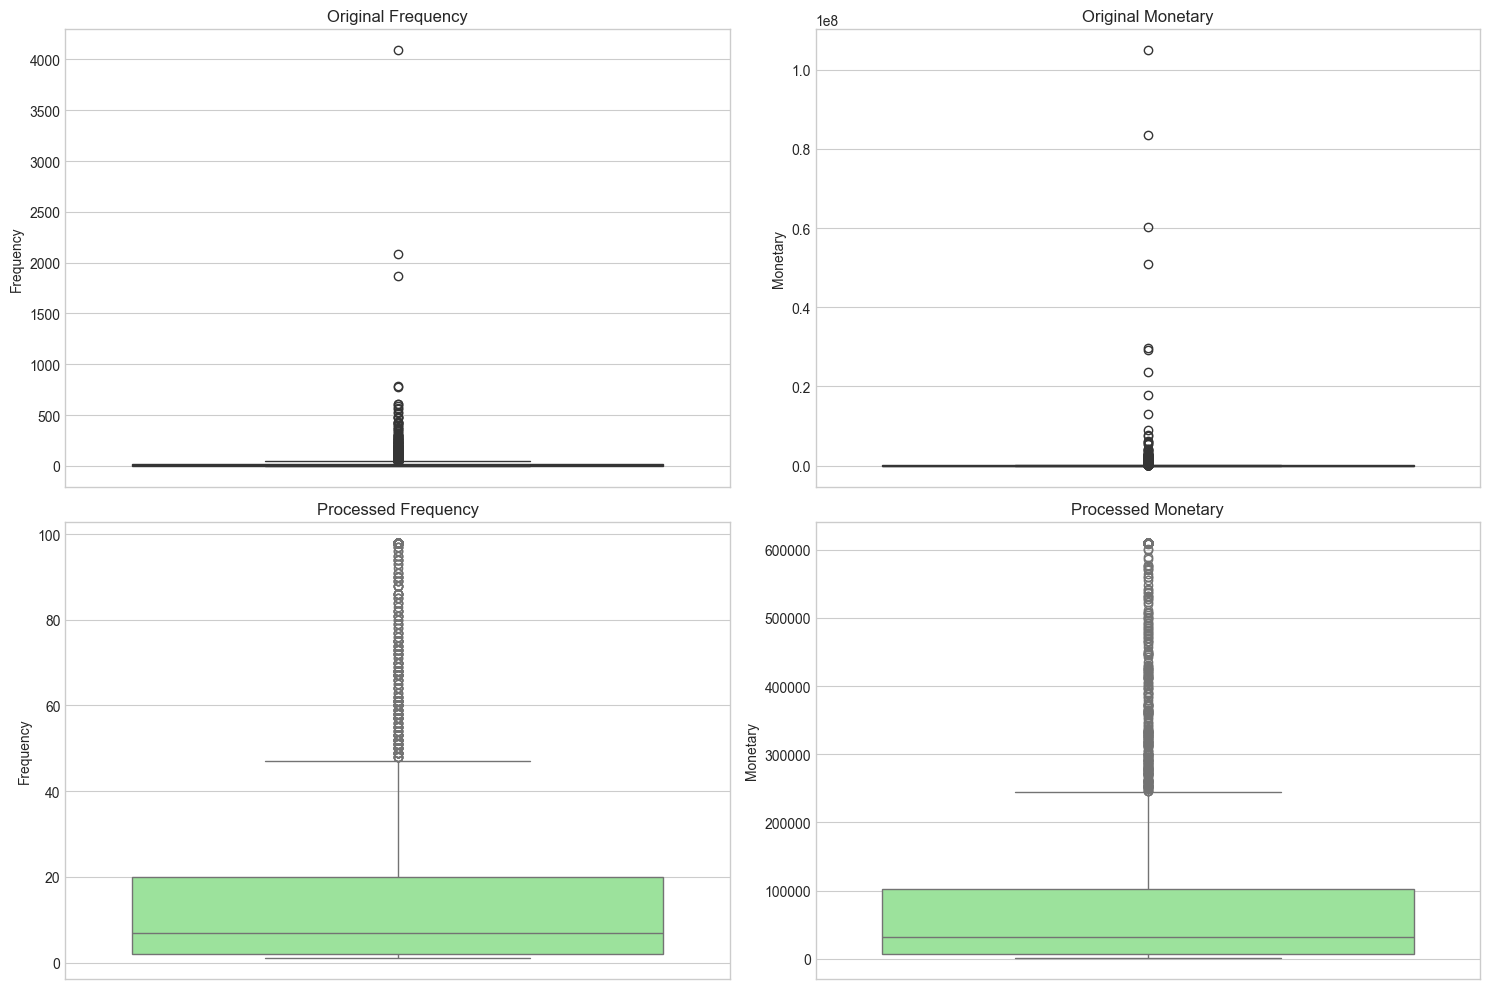


Processed data saved to 'data/processed/rfm_clean.csv'


In [5]:
def handle_outliers(df, columns, lower_quantile=0.05, upper_quantile=0.95):
    """
    Handle outliers using winsorization (capping at specified percentiles)
    
    Parameters:
    - df: DataFrame containing the data
    - columns: List of column names to process
    - lower_quantile: Lower percentile (0-1)
    - upper_quantile: Upper percentile (0-1)
    
    Returns:
    - DataFrame with processed columns
    - Dictionary of bounds used for winsorization
    """
    bounds = {}
    df_clean = df.copy()
    
    for col in columns:
        # Calculate bounds
        lower = df[col].quantile(lower_quantile)
        upper = df[col].quantile(upper_quantile)
        bounds[col] = {'lower': lower, 'upper': upper}
        
        # Apply winsorization
        df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)
    
    return df_clean, bounds

# =====================================
# 3. Handle Outliers
# =====================================
# Select columns to process (skipping CustomerId and Recency)
cols_to_process = ['Frequency', 'Monetary']

# Before processing - show summary
print("="*50)
print("BEFORE OUTLIER HANDLING")
print("="*50)
display(rfm[cols_to_process].describe().T)

# Apply winsorization
rfm_clean, bounds = handle_outliers(rfm, 
                                  columns=cols_to_process,
                                  lower_quantile=0.05,
                                  upper_quantile=0.95)

# =====================================
# 4. Validate Results
# =====================================
# After processing - show summary
print("\n" + "="*50)
print("AFTER OUTLIER HANDLING")
print("="*50)
display(rfm_clean[cols_to_process].describe().T)

# Show bounds used
print("\n" + "="*50)
print("WINSORIZATION BOUNDS APPLIED")
print("="*50)
for col, bound in bounds.items():
    print(f"{col}:")
    print(f"  - Lower bound ({5}%): {bound['lower']:.2f}")
    print(f"  - Upper bound ({95}%): {bound['upper']:.2f}")

# =====================================
# 5. Visual Comparison
# =====================================
# Set up the figure
plt.figure(figsize=(15, 10))

# Plot for each column
for i, col in enumerate(cols_to_process, 1):
    # Original
    plt.subplot(2, 2, i)
    sns.boxplot(y=rfm[col])
    plt.title(f'Original {col}')
    
    # Processed
    plt.subplot(2, 2, i+2)
    sns.boxplot(y=rfm_clean[col], color='lightgreen')
    plt.title(f'Processed {col}')

plt.tight_layout()
plt.show()

# =====================================
# 6. Save Processed Data
# =====================================
rfm_clean.to_csv('../data/processed/rfm_clean.csv', index=False)
print("\nProcessed data saved to 'data/processed/rfm_clean.csv'")

## Feature Engineering

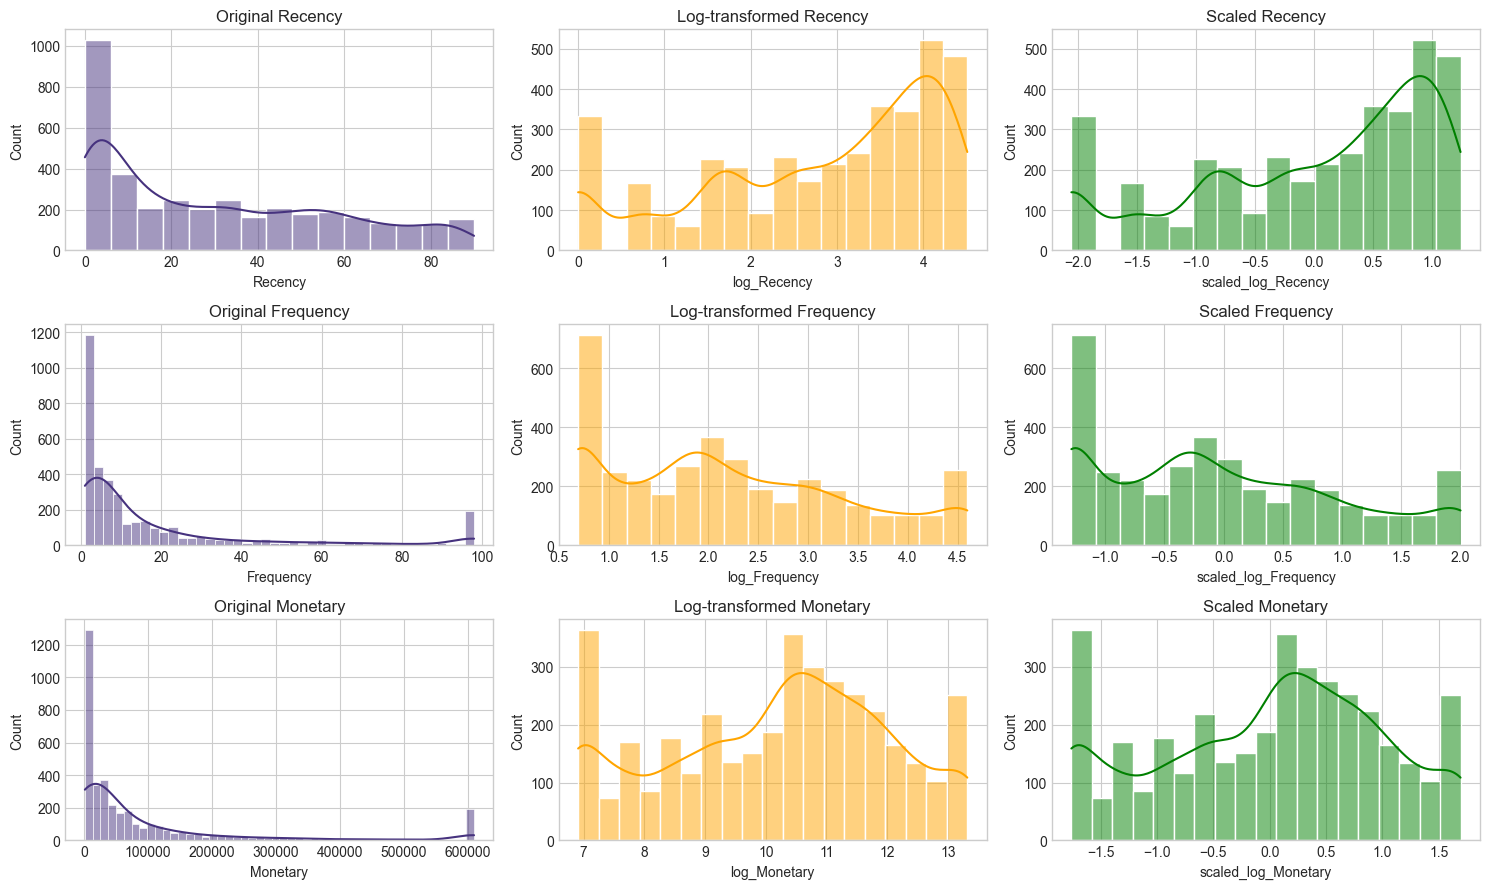

ORIGINAL FEATURES


,mean,std,min,25%,50%,75%,max
Recency,30.461251,27.118932,0.0,5.0,24.0,53.0,90.0
Frequency,18.078835,25.768020,1.0,2.0,7.0,20.0,98.0
Monetary,96832.323303,154361.547703,1000.0,6500.0,32000.0,102060.0,610077.1



LOG-TRANSFORMED FEATURES


,mean,std,min,25%,50%,75%,max
log_Recency,2.810165,1.367351,0.000000,1.791759,3.218876,3.988984,4.510860
log_Frequency,2.219121,1.186921,0.693147,1.098612,2.079442,3.044522,4.595120
log_Monetary,10.176090,1.855928,6.908755,8.779711,10.373522,11.533326,13.321342



SCALED FEATURES


,mean,std,min,25%,50%,75%,max
scaled_log_Recency,-3.873616e-16,1.000134,-2.055464,-0.744901,0.298947,0.862234,1.243954
scaled_log_Frequency,-1.898831e-16,1.000134,-1.285830,-0.944173,-0.117698,0.695507,2.002085
scaled_log_Monetary,8.122252e-16,1.000134,-1.760721,-0.752489,0.106393,0.731395,1.694932



Processed data saved to 'data/processed/rfm_processed.csv'


In [ ]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# =====================================
# 2. Apply Log Transformation
# =====================================
def apply_log_transform(df, columns):
    """
    Apply log transformation to specified columns using log1p (handles zeros)
    
    Parameters:
    - df: DataFrame containing the data
    - columns: List of column names to transform
    
    Returns:
    - DataFrame with log-transformed columns
    """
    df_log = df.copy()
    for col in columns:
        df_log[f'log_{col}'] = np.log1p(df_log[col])
    return df_log

# Apply log transformation to RFM metrics
rfm_log = apply_log_transform(rfm_clean, ['Recency', 'Frequency', 'Monetary'])

# =====================================
# 3. Scale Features
# =====================================
def scale_features(df, columns, scaler=StandardScaler()):
    """
    Scale specified features using the provided scaler
    
    Parameters:
    - df: DataFrame containing the data
    - columns: List of column names to scale
    - scaler: Scaler instance (default: StandardScaler)
    
    Returns:
    - DataFrame with scaled features
    - Fitted scaler object
    """
    df_scaled = df.copy()
    scaled_features = scaler.fit_transform(df[columns])
    df_scaled[[f'scaled_{col}' for col in columns]] = scaled_features
    return df_scaled, scaler

# Scale the log-transformed features
rfm_scaled, fitted_scaler = scale_features(
    rfm_log, 
    ['log_Recency', 'log_Frequency', 'log_Monetary']
)

# =====================================
# 4. Visualize Transformations
# =====================================
def plot_transformations(original_df, log_df, scaled_df, features):
    """
    Plot original, log-transformed, and scaled distributions
    
    Parameters:
    - original_df: DataFrame with original features
    - log_df: DataFrame with log-transformed features
    - scaled_df: DataFrame with scaled features
    - features: List of original feature names
    """
    plt.figure(figsize=(15, 3*len(features)))
    
    for i, feature in enumerate(features, 1):
        # Original
        plt.subplot(len(features), 3, 3*i-2)
        sns.histplot(original_df[feature], kde=True)
        plt.title(f'Original {feature}')
        
        # Log-transformed
        plt.subplot(len(features), 3, 3*i-1)
        sns.histplot(log_df[f'log_{feature}'], kde=True, color='orange')
        plt.title(f'Log-transformed {feature}')
        
        # Scaled
        plt.subplot(len(features), 3, 3*i)
        sns.histplot(scaled_df[f'scaled_log_{feature}'], kde=True, color='green')
        plt.title(f'Scaled {feature}')
    
    plt.tight_layout()
    plt.show()

# Generate visualizations
plot_transformations(
    rfm_clean,
    rfm_log,
    rfm_scaled,
    ['Recency', 'Frequency', 'Monetary']
)

# =====================================
# 5. Display Summary Statistics
# =====================================
def print_summary_stats(df, prefix=''):
    """Print summary statistics for transformed features"""
    stats = df.describe().T
    display(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

print("="*50)
print("ORIGINAL FEATURES")
print("="*50)
print_summary_stats(rfm_clean[['Recency', 'Frequency', 'Monetary']])

print("\n" + "="*50)
print("LOG-TRANSFORMED FEATURES")
print("="*50)
print_summary_stats(rfm_log[['log_Recency', 'log_Frequency', 'log_Monetary']])

print("\n" + "="*50)
print("SCALED FEATURES")
print("="*50)
print_summary_stats(rfm_scaled[['scaled_log_Recency', 'scaled_log_Frequency', 'scaled_log_Monetary']])

# =====================================
# 6. Save Processed Data
# =====================================
# Combine all features
final_rfm = pd.concat([
    rfm_clean[['CustomerId']],
    rfm_scaled.filter(regex='scaled_')
], axis=1)

# Save to file
final_rfm.to_csv('../data/processed/rfm_processed.csv', index=False)
print("\nProcessed data saved to 'data/processed/rfm_processed.csv'")

## Customer Segmentation

K-means clustering applied successfully with 3 clusters
Cluster distribution:
Cluster
0    1216
1     940
2    1586
Name: count, dtype: int64

Cluster Profiles (Original Scale):


,Recency,Frequency,Monetary,Count
Cluster,,,,
0,46.011513,2.310033,4681.236020,1216
1,3.877660,48.491489,226431.529894,940
2,34.294451,12.143758,90673.728058,1586


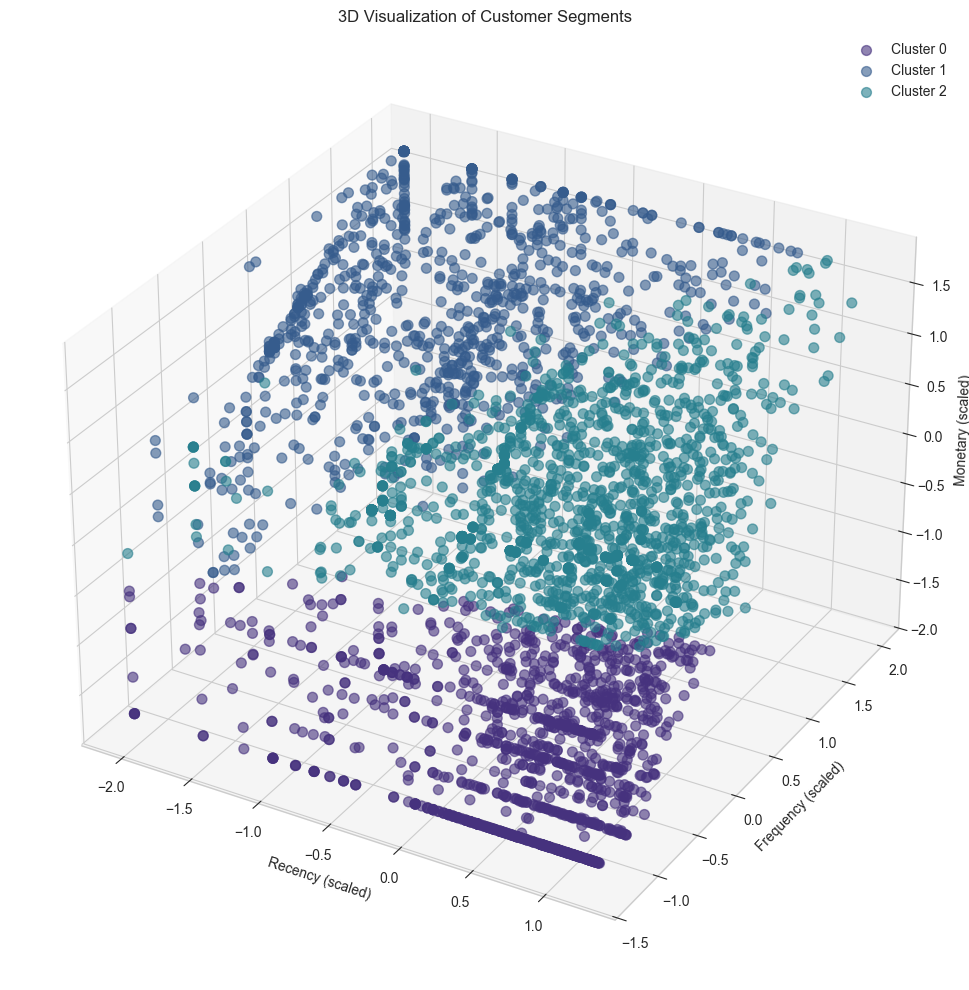


Silhouette Score: 0.3613
Weak cluster structure

Cluster assignments saved to 'data/processed/customer_segments.csv'
Cluster profiles saved to 'data/processed/cluster_profiles.csv'


In [7]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# =====================================
# 2. Prepare Data for Clustering
# =====================================
# Assuming we have our scaled features from previous steps
X = final_rfm[['scaled_log_Recency', 'scaled_log_Frequency', 'scaled_log_Monetary']]

# =====================================
# 3. Apply K-means Clustering
# =====================================
# Initialize K-means with 3 clusters and fixed random state
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_rfm['Cluster'] = kmeans.fit_predict(X)

print("K-means clustering applied successfully with 3 clusters")
print("Cluster distribution:")
print(final_rfm['Cluster'].value_counts().sort_index())

# =====================================
# 4. Analyze Cluster Characteristics
# =====================================
# Merge with original RFM values for interpretation
cluster_analysis = rfm_clean.merge(
    final_rfm[['CustomerId', 'Cluster']],
    on='CustomerId'
)

# Calculate mean RFM values per cluster
cluster_means = cluster_analysis.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerId': 'count'
}).rename(columns={'CustomerId': 'Count'})

print("\nCluster Profiles (Original Scale):")
display(cluster_means)

# =====================================
# 5. Visualize Clusters (3D Plot)
# =====================================
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_num in range(3):
    cluster_data = final_rfm[final_rfm['Cluster'] == cluster_num]
    ax.scatter(
        cluster_data['scaled_log_Recency'],
        cluster_data['scaled_log_Frequency'],
        cluster_data['scaled_log_Monetary'],
        label=f'Cluster {cluster_num}',
        s=50,
        alpha=0.6
    )

ax.set_xlabel('Recency (scaled)')
ax.set_ylabel('Frequency (scaled)')
ax.set_zlabel('Monetary (scaled)')
ax.set_title('3D Visualization of Customer Segments')
plt.legend()
plt.tight_layout()
plt.show()

# =====================================
# 6. Evaluate Cluster Quality
# =====================================
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, final_rfm['Cluster'])
print(f"\nSilhouette Score: {silhouette_avg:.4f}")

# Interpretation
if silhouette_avg > 0.7:
    print("Strong cluster structure")
elif silhouette_avg > 0.5:
    print("Reasonable cluster structure")
elif silhouette_avg > 0.25:
    print("Weak cluster structure")
else:
    print("No substantial cluster structure")

# =====================================
# 7. Save Results
# =====================================
# Save cluster assignments
final_rfm.to_csv('../data/processed/customer_segments.csv', index=False)
print("\nCluster assignments saved to 'data/processed/customer_segments.csv'")

# Save cluster profiles
cluster_profiles = cluster_analysis.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max'],
    'CustomerId': 'count'
}).rename(columns={'CustomerId': 'Count'})

cluster_profiles.to_csv('../data/processed/cluster_profiles.csv')
print("Cluster profiles saved to 'data/processed/cluster_profiles.csv'")

## Risk Label Creation

In [8]:
# Display mean RFM values for each cluster
cluster_summary = cluster_analysis.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerId': 'count'
}).rename(columns={'CustomerId': 'Count'})

print("Cluster Summary (Mean Values):")
display(cluster_summary)




Cluster Summary (Mean Values):


,Recency,Frequency,Monetary,Count
Cluster,,,,
0,46.011513,2.310033,4681.236020,1216
1,3.877660,48.491489,226431.529894,940
2,34.294451,12.143758,90673.728058,1586


In [9]:
# Define risk labels based on cluster analysis
risk_labels = {
    0: 'Low Risk',    # Example: Low Recency, High Frequency, High Monetary
    1: 'Medium Risk', # Example: Medium Recency, Medium Frequency, Medium Monetary
    2: 'High Risk'    # Example: High Recency, Low Frequency, Low Monetary
}

# Map cluster numbers to risk labels
final_rfm['Risk_Label'] = final_rfm['Cluster'].map(risk_labels)

# Display risk label distribution
print("\nRisk Label Distribution:")
print(final_rfm['Risk_Label'].value_counts())


Risk Label Distribution:
Risk_Label
High Risk      1586
Low Risk       1216
Medium Risk     940
Name: count, dtype: int64


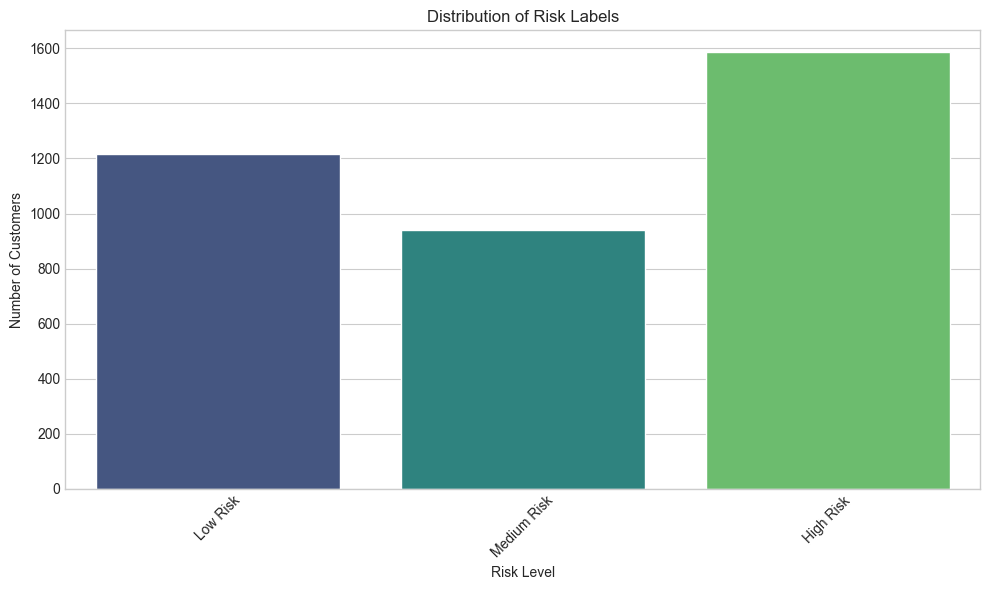

In [10]:
# Plot risk label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk_Label', data=final_rfm, order=['Low Risk', 'Medium Risk', 'High Risk'], palette='viridis')
plt.title('Distribution of Risk Labels')
plt.xlabel('Risk Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Save the final dataset with risk labels
final_rfm.to_csv('../data/processed/customer_risk_labels.csv', index=False)
print("\nRisk labels saved to 'data/processed/customer_risk_labels.csv'")


Risk labels saved to 'data/processed/customer_risk_labels.csv'


## Data Integration

In [12]:
# Load the original dataset
original_df = pd.read_csv('../data/raw/raw_data.csv')  # Adjust the path as needed
print("Original dataset shape:", original_df.shape)

Original dataset shape: (95662, 16)


In [13]:
# Merge risk labels with the original dataset
final_df = pd.merge(
    original_df,
    final_rfm[['CustomerId', 'Risk_Label', 'Cluster']],
    on='CustomerId',
    how='left'
)

print("Merged dataset shape:", final_df.shape)
print("\nMissing Risk Labels:", final_df['Risk_Label'].isnull().sum())

Merged dataset shape: (95662, 18)

Missing Risk Labels: 0


In [14]:
# Check for missing risk labels
if final_df['Risk_Label'].isnull().any():
    print("\nHandling missing risk labels...")
    # Option 1: Assign a default label (e.g., 'Unknown')
    final_df['Risk_Label'] = final_df['Risk_Label'].fillna('Unknown')
    print("Missing labels filled with 'Unknown'.")
else:
    print("\nNo missing risk labels found.")


No missing risk labels found.


In [15]:
# Save the final dataset
final_df.to_csv('../data/processed/final_customer_data_with_risk.csv', index=False)
print("\nFinal dataset with risk labels saved to 'data/processed/final_customer_data_with_risk.csv'")


Final dataset with risk labels saved to 'data/processed/final_customer_data_with_risk.csv'


## Summary Report and Documentation

In [17]:
def generate_summary_report(cluster_summary, final_rfm):
    """Generate a markdown summary of the analysis."""
    report = """
# Customer Risk Segmentation Report

## 1. Overview
This report summarizes the customer segmentation based on RFM analysis and K-means clustering.

## 2. Cluster Summary
"""
    # Add cluster statistics
    report += "\n" + cluster_summary.to_markdown() + "\n"
    
    # Add risk label distribution
    risk_dist = final_rfm['Risk_Label'].value_counts().to_frame('Count')
    report += "\n## 3. Risk Label Distribution\n"
    report += risk_dist.to_markdown() + "\n"
    
    # Add interpretation
    report += """
## 4. Interpretation
- **High Risk**: Customers with high recency, low frequency, and low monetary value.
- **Medium Risk**: Customers with moderate engagement and spending.
- **Low Risk**: Customers with recent activity, high frequency, and high spending.
"""
    return report

# Generate and display the report
report = generate_summary_report(cluster_summary, final_rfm)
print(report)


# Customer Risk Segmentation Report

## 1. Overview
This report summarizes the customer segmentation based on RFM analysis and K-means clustering.

## 2. Cluster Summary

|   Cluster |   Recency |   Frequency |   Monetary |   Count |
|----------:|----------:|------------:|-----------:|--------:|
|         0 |  46.0115  |     2.31003 |    4681.24 |    1216 |
|         1 |   3.87766 |    48.4915  |  226432    |     940 |
|         2 |  34.2945  |    12.1438  |   90673.7  |    1586 |

## 3. Risk Label Distribution
| Risk_Label   |   Count |
|:-------------|--------:|
| High Risk    |    1586 |
| Low Risk     |    1216 |
| Medium Risk  |     940 |

## 4. Interpretation
- **High Risk**: Customers with high recency, low frequency, and low monetary value.
- **Medium Risk**: Customers with moderate engagement and spending.
- **Low Risk**: Customers with recent activity, high frequency, and high spending.



## Save the visualizations

In [18]:
# Create a directory for visualizations if it doesn't exist
os.makedirs('../reports/figures', exist_ok=True)

# Save the risk distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk_Label', data=final_rfm, 
              order=['Low Risk', 'Medium Risk', 'High Risk'], 
              palette='viridis')
plt.title('Distribution of Risk Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/figures/risk_distribution.png', dpi=300, bbox_inches='tight')
plt.close()

print("Visualizations saved to 'reports/figures/'")

Visualizations saved to 'reports/figures/'


In [19]:
# =====================================
# 1. Save Final Dataset with Risk Labels
# =====================================
# Ensure the output directory exists
import os
os.makedirs('../data/processed', exist_ok=True)

# Save the final dataset with all features and risk labels
final_output_path = '../data/processed/customers_with_risk_labels.csv'
final_rfm.to_csv(final_output_path, index=False)
print(f"Final dataset with risk labels saved to: {final_output_path}")

# =====================================
# 2. Create Cluster Profiles
# =====================================
# Calculate cluster statistics
cluster_profiles = cluster_analysis.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'min', 'max'],
    'Frequency': ['mean', 'median', 'min', 'max'],
    'Monetary': ['mean', 'median', 'min', 'max'],
    'CustomerId': 'count'
}).rename(columns={'CustomerId': 'Count'})

# Add risk labels to profiles
cluster_profiles['Risk_Label'] = [risk_labels[i] for i in sorted(risk_labels.keys())]

print("\nCluster Profiles:")
display(cluster_profiles)

# =====================================
# 3. Save Cluster Profiles
# =====================================
profiles_path = '../data/processed/cluster_profiles.csv'
cluster_profiles.to_csv(profiles_path)
print(f"\nCluster profiles saved to: {profiles_path}")

# =====================================
# 4. Final Summary
# =====================================
print("\n" + "="*50)
print("TASK 4: PROXY TARGET VARIABLE ENGINEERING - COMPLETE")
print("="*50)
print("\nSummary of Results:")
print(f"- Total customers analyzed: {len(final_rfm):,}")
print(f"- High-risk customers: {len(final_rfm[final_rfm["Risk_Label"] == "High Risk"]):,}")
print(f"- Medium-risk customers: {len(final_rfm[final_rfm["Risk_Label"] == "Medium Risk"]):,}")
print(f"- Low-risk customers: {len(final_rfm[final_rfm["Risk_Label"] == "Low Risk"]):,}")

print("\nNext Steps:")
print("1. The dataset is now ready for model training (Task 5)")
print("2. Use 'Risk_Label' as your target variable")
print("3. Consider the cluster assignments as additional features")

Final dataset with risk labels saved to: ../data/processed/customers_with_risk_labels.csv

Cluster Profiles:


Recency                 Frequency                      Monetary  \
              mean median min max       mean median min max           mean   
Cluster                                                                      
0        46.011513   45.0   0  90   2.310033    1.0   1  11    4681.236020   
1         3.877660    2.0   0  48  48.491489   39.0   2  98  226431.529894   
2        34.294451   32.0   0  89  12.143758    8.0   1  98   90673.728058   

                                    Count   Risk_Label  
           median     min       max count               
Cluster                                                 
0          2850.0  1000.0   36917.0  1216     Low Risk  
1        152000.0  3085.0  610077.1   940  Medium Risk  
2         42000.0  5735.0  610077.1  1586    High Risk


Cluster profiles saved to: ../data/processed/cluster_profiles.csv

TASK 4: PROXY TARGET VARIABLE ENGINEERING - COMPLETE

Summary of Results:
- Total customers analyzed: 3,742
- High-risk customers: 1,586
- Medium-risk customers: 940
- Low-risk customers: 1,216

Next Steps:
1. The dataset is now ready for model training (Task 5)
2. Use 'Risk_Label' as your target variable
3. Consider the cluster assignments as additional features
